In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
#Import Data
df = pd.read_csv("listings.csv")

# Data Analysis

In [4]:
df.head()

,id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,15965441,José,11/14/16,within an hour,83%,0%,f,3.0,t,t,...,$150.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
1,47908784,Raquel,7/15/16,within a day,50%,100%,f,1.0,t,f,...,$450.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
2,52239613,Fabio,9/13/21,within a day,100%,89%,f,0.0,t,f,...,$350.00,5.00,5.00,5.00,4.89,4.78,4.78,4.89,f,1.16
3,10445855,Márcio,1/24/12,within an hour,100%,100%,f,2.0,t,t,...,$145.00,4.78,4.91,4.89,4.93,4.87,4.70,4.57,f,0.64
4,5.65E+17,Júlio,12/07/14,within an hour,100%,67%,f,0.0,t,t,...,$180.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN


In [80]:
#understanding the dataset columns and redefining values as well as types based on requirements
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24886 entries, 2 to 2
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           24885 non-null  object 
 1   host_name                    24765 non-null  object 
 2   host_since                   24765 non-null  object 
 3   host_response_time           19664 non-null  object 
 4   host_response_rate           19664 non-null  object 
 5   host_acceptance_rate         20072 non-null  object 
 6   host_is_superhost            24764 non-null  object 
 7   host_total_listings_count    24764 non-null  float64
 8   host_has_profile_pic         24764 non-null  object 
 9   host_identity_verified       24764 non-null  object 
 10  neighbourhood_cleansed       24881 non-null  object 
 11  latitude                     24881 non-null  float64
 12  longitude                    24881 non-null  float64
 13  property_type       

In [82]:
df.isnull().sum()

id                                1
host_name                       121
host_since                      121
host_response_time             5222
host_response_rate             5222
host_acceptance_rate           4814
host_is_superhost               122
host_total_listings_count       122
host_has_profile_pic            122
host_identity_verified          122
neighbourhood_cleansed            5
latitude                          5
longitude                         5
property_type                     5
room_type                         5
bathrooms_text                   58
bedrooms                          0
beds                              0
price                             6
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
instant_bookable                  6
reviews_per_month           

In [7]:
#Changing Price to float values
df['price']=df['price'].replace('[\$\,]', '', regex=True).astype(float)

#setting all NaN values to 0 for column - 'reviews_per_month'
df.fillna({'reviews_per_month':0, 'accommodates':0,'beds':0,'bedrooms':0 }, inplace=True)

df['beds'] =df['beds'].astype(int)
df['bedrooms'] =df['bedrooms'].astype(int)
df['accommodates'] =df['accommodates'].astype(int)
df.info()

#replace other numeric columns with mean values / Imputing Mean values for other review columns
impute_df = df[['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']]
impute_df = impute_df.fillna(impute_df.mean())
df.update(impute_df)

#updating 
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24886 entries, 0 to 24885
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           24885 non-null  object 
 1   host_name                    24765 non-null  object 
 2   host_since                   24765 non-null  object 
 3   host_response_time           19664 non-null  object 
 4   host_response_rate           19664 non-null  object 
 5   host_acceptance_rate         20072 non-null  object 
 6   host_is_superhost            24764 non-null  object 
 7   host_total_listings_count    24764 non-null  float64
 8   host_has_profile_pic         24764 non-null  object 
 9   host_identity_verified       24764 non-null  object 
 10  neighbourhood_cleansed       24881 non-null  object 
 11  latitude                     24881 non-null  float64
 12  longitude                    24881 non-null  float64
 13  property_type   

,id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,15965441,José,11/14/16,within an hour,83%,0%,f,3.0,t,t,...,150.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00
1,47908784,Raquel,7/15/16,within a day,50%,100%,f,1.0,t,f,...,450.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00
2,52239613,Fabio,9/13/21,within a day,100%,89%,f,0.0,t,f,...,350.0,5.000000,5.000000,5.000000,4.890000,4.780000,4.780000,4.890000,f,1.16
3,10445855,Márcio,1/24/12,within an hour,100%,100%,f,2.0,t,t,...,145.0,4.780000,4.910000,4.890000,4.930000,4.870000,4.700000,4.570000,f,0.64
4,5.65E+17,Júlio,12/07/14,within an hour,100%,67%,f,0.0,t,t,...,180.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24886 entries, 0 to 24885
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           24885 non-null  object 
 1   host_name                    24765 non-null  object 
 2   host_since                   24765 non-null  object 
 3   host_response_time           19664 non-null  object 
 4   host_response_rate           19664 non-null  object 
 5   host_acceptance_rate         20072 non-null  object 
 6   host_is_superhost            24764 non-null  object 
 7   host_total_listings_count    24764 non-null  float64
 8   host_has_profile_pic         24764 non-null  object 
 9   host_identity_verified       24764 non-null  object 
 10  neighbourhood_cleansed       24881 non-null  object 
 11  latitude                     24881 non-null  float64
 12  longitude                    24881 non-null  float64
 13  property_type   

# Data Visualization

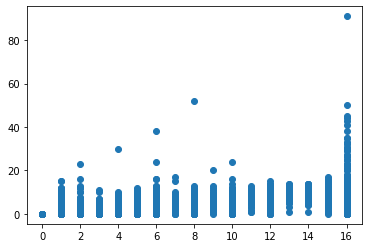

In [8]:
plt.scatter(x=df['accommodates'], y=df['beds'])
plt.show()

In [9]:
#removing unwanted columns for problem statement 1 : Larger properties should receive more review as per accomodation
#columns defining larger property are filtered
df1 = df[['property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'price','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value','instant_bookable',
       'reviews_per_month']]
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24886 entries, 0 to 24885
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   property_type                24881 non-null  object 
 1   room_type                    24881 non-null  object 
 2   accommodates                 24886 non-null  int64  
 3   bathrooms_text               24828 non-null  object 
 4   bedrooms                     24886 non-null  int64  
 5   beds                         24886 non-null  int64  
 6   price                        24880 non-null  float64
 7   review_scores_rating         24886 non-null  float64
 8   review_scores_accuracy       24886 non-null  float64
 9   review_scores_cleanliness    24886 non-null  float64
 10  review_scores_checkin        24886 non-null  float64
 11  review_scores_communication  24886 non-null  float64
 12  review_scores_location       24886 non-null  float64
 13  review_scores_va

,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,Private room in rental unit,Private room,2,1 bath,1,1,150.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00
1,Entire condo,Entire home/apt,4,2 baths,2,2,450.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00
2,Entire rental unit,Entire home/apt,5,1 bath,2,5,350.0,5.000000,5.000000,5.000000,4.890000,4.780000,4.780000,4.890000,f,1.16
3,Entire home,Entire home/apt,3,1 bath,1,2,145.0,4.780000,4.910000,4.890000,4.930000,4.870000,4.700000,4.570000,f,0.64
4,Private room in bed and breakfast,Private room,4,1.5 baths,2,3,180.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00


In [10]:
#Categorical columns - "property_type" "room_type" "bathrooms_text" changing to One Hot encoding + get_dummies for these 
df1 = df1.replace(to_replace = {"6/21/22", 'nan'}, value ="Entire home/apt")
df1['room_type'] =df1['room_type'].astype(str)
df1['room_type'].value_counts() 
df1['property_type'].value_counts()
df1['accommodates'].value_counts()

df1.apply(lambda col: len(col.unique()))
col = ["room_type"] 
df_room_type = pd.get_dummies(df1, columns = col, drop_first=False)

col=["property_type"]
df_property_type = pd.get_dummies(df1, columns = col, drop_first=False)

df_room_type.head()
df1.info()
df_room_type.info()

Entire home/apt    19134
Private room        5230
Shared room          450
Hotel room            67
nan                    5
Name: room_type, dtype: int64

Entire rental unit             14315
Private room in rental unit     3043
Entire condo                    1707
Entire home                     1139
Private room in home             974
                               ...  
364                                1
Shared room in nature lodge        1
Yurt                               1
Shared room in cottage             1
Room in nature lodge               1
Name: property_type, Length: 84, dtype: int64

4     6948
2     6361
6     3090
3     2720
5     1942
1     1157
8      924
7      535
10     465
12     195
16     182
9      158
14      69
15      54
13      37
11      36
0       13
Name: accommodates, dtype: int64

property_type                    85
room_type                         5
accommodates                     17
bathrooms_text                   50
bedrooms                         19
beds                             41
price                          1664
review_scores_rating            136
review_scores_accuracy          127
review_scores_cleanliness       164
review_scores_checkin           116
review_scores_communication     125
review_scores_location          122
review_scores_value             142
instant_bookable                  3
reviews_per_month               569
dtype: int64

,property_type,accommodates,bathrooms_text,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,room_type_nan
0,Private room in rental unit,2,1 bath,1,1,150.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00,0,0,1,0,0
1,Entire condo,4,2 baths,2,2,450.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00,1,0,0,0,0
2,Entire rental unit,5,1 bath,2,5,350.0,5.000000,5.000000,5.000000,4.890000,4.780000,4.780000,4.890000,f,1.16,1,0,0,0,0
3,Entire home,3,1 bath,1,2,145.0,4.780000,4.910000,4.890000,4.930000,4.870000,4.700000,4.570000,f,0.64,1,0,0,0,0
4,Private room in bed and breakfast,4,1.5 baths,2,3,180.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24886 entries, 0 to 24885
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   property_type                24881 non-null  object 
 1   room_type                    24886 non-null  object 
 2   accommodates                 24886 non-null  int64  
 3   bathrooms_text               24828 non-null  object 
 4   bedrooms                     24886 non-null  int64  
 5   beds                         24886 non-null  int64  
 6   price                        24880 non-null  float64
 7   review_scores_rating         24886 non-null  float64
 8   review_scores_accuracy       24886 non-null  float64
 9   review_scores_cleanliness    24886 non-null  float64
 10  review_scores_checkin        24886 non-null  float64
 11  review_scores_communication  24886 non-null  float64
 12  review_scores_location       24886 non-null  float64
 13  review_scores_va

In [11]:
df_property_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24886 entries, 0 to 24885
Data columns (total 99 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   room_type                                         24886 non-null  object 
 1   accommodates                                      24886 non-null  int64  
 2   bathrooms_text                                    24828 non-null  object 
 3   bedrooms                                          24886 non-null  int64  
 4   beds                                              24886 non-null  int64  
 5   price                                             24880 non-null  float64
 6   review_scores_rating                              24886 non-null  float64
 7   review_scores_accuracy                            24886 non-null  float64
 8   review_scores_cleanliness                         24886 non-null  float64
 9   review_scores_che

array([[<AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'beds'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'review_scores_rating'}>,
        <AxesSubplot:title={'center':'review_scores_accuracy'}>,
        <AxesSubplot:title={'center':'review_scores_cleanliness'}>,
        <AxesSubplot:title={'center':'review_scores_checkin'}>],
       [<AxesSubplot:title={'center':'review_scores_communication'}>,
        <AxesSubplot:title={'center':'review_scores_location'}>,
        <AxesSubplot:title={'center':'review_scores_value'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>],
       [<AxesSubplot:title={'center':'room_type_Entire home/apt'}>,
        <AxesSubplot:title={'center':'room_type_Hotel room'}>,
        <AxesSubplot:title={'center':'room_type_Private room'}>,
        <AxesSubplot:title={'center':'room_type_Shared room'}>],
       [<AxesSubpl

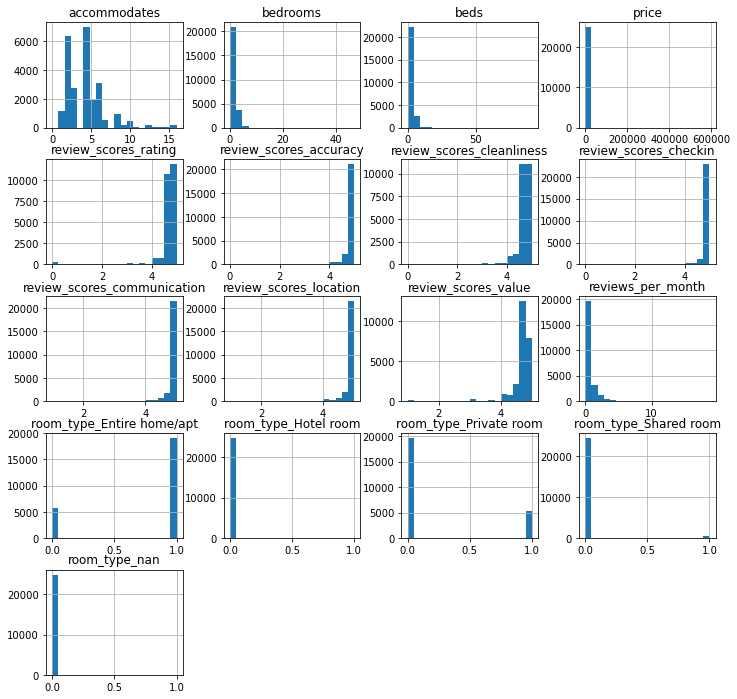

In [83]:
#converting property_type and room_type to specific encoding and then get dummies to add for correlation 
#"property_type" "room_type" "bathroom_text" 
df_room_type.hist(bins=20, figsize=(12,12))
plt.show()

<AxesSubplot:title={'center':'Roomtype vs accomodation capacity'}, xlabel='Room types', ylabel='Accomodations'>

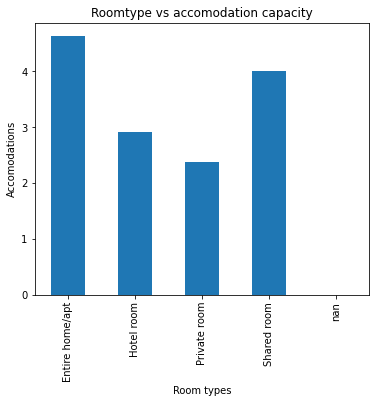

In [13]:
g = df1.groupby(['room_type'])['accommodates'].mean()
g.plot(kind='bar', title='Roomtype vs accomodation capacity', ylabel='Accomodations',
         xlabel='Room types', figsize=(6, 5))

<AxesSubplot:title={'center':'Room type vs Reviews per month'}, xlabel='Room types', ylabel='Reviews per momth'>

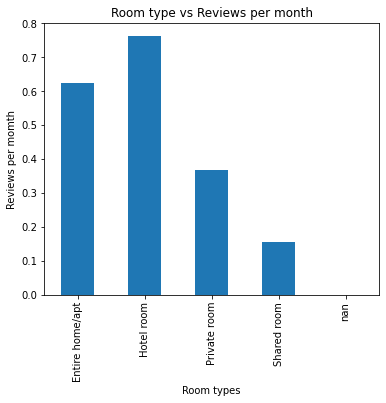

In [14]:
g = df1.groupby(['room_type'])['reviews_per_month'].mean()
g.plot(kind='bar', title='Room type vs Reviews per month', ylabel='Reviews per momth',
         xlabel='Room types', figsize=(6, 5))

<AxesSubplot:title={'center':'Property Prices'}, xlabel='Room Types', ylabel='Prices'>

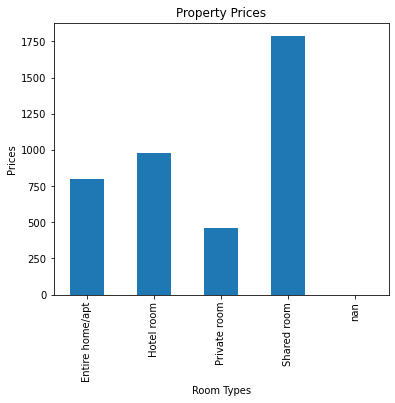

In [15]:
g = df1.groupby(['room_type'])['price'].mean()
g.plot(kind='bar', title='Property Prices', ylabel='Prices',
         xlabel='Room Types', figsize=(6, 5))

<AxesSubplot:>

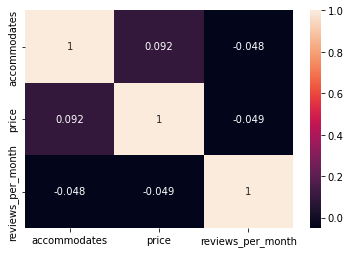

In [86]:
corr = df_room_type[['room_type_Entire home/apt','room_type_Hotel room','room_type_Private room','room_type_Shared room','accommodates','reviews_per_month']].corr()
corr = df1[['room_type','accommodates','price','reviews_per_month']].corr()

sns.heatmap(corr, annot=True)
plt.show()

array([[<AxesSubplot:xlabel='accommodates', ylabel='accommodates'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='accommodates'>,
        <AxesSubplot:xlabel='beds', ylabel='accommodates'>,
        <AxesSubplot:xlabel='price', ylabel='accommodates'>,
        <AxesSubplot:xlabel='review_scores_rating', ylabel='accommodates'>,
        <AxesSubplot:xlabel='review_scores_accuracy', ylabel='accommodates'>,
        <AxesSubplot:xlabel='review_scores_cleanliness', ylabel='accommodates'>,
        <AxesSubplot:xlabel='review_scores_checkin', ylabel='accommodates'>,
        <AxesSubplot:xlabel='review_scores_communication', ylabel='accommodates'>,
        <AxesSubplot:xlabel='review_scores_location', ylabel='accommodates'>,
        <AxesSubplot:xlabel='review_scores_value', ylabel='accommodates'>,
        <AxesSubplot:xlabel='reviews_per_month', ylabel='accommodates'>],
       [<AxesSubplot:xlabel='accommodates', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='bedrooms'>,
 

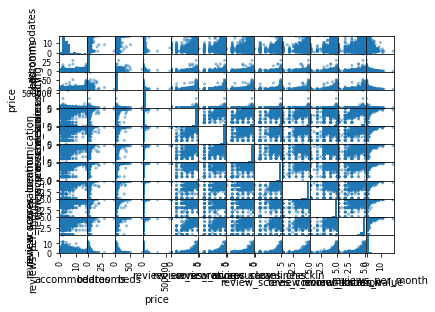

In [84]:
from pandas.plotting import scatter_matrix
scatter_matrix(df1)

<AxesSubplot:xlabel='accommodates', ylabel='price'>

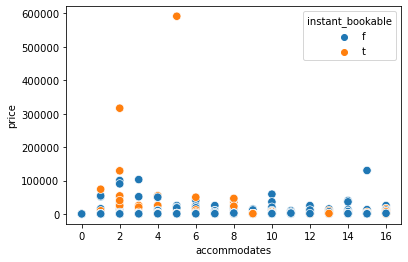

In [18]:
sns.scatterplot(x=df1.accommodates, y=df1.price, hue=df1.instant_bookable,s=70)

# corr_matrix =df1.corr()
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corr_matrix, annot=True)
plt.show()
#df1['property_type'].value_counts()


#df1.plot(x='property_type', y = 'accommodates', kind='scatter')
#df.groupby(['property_type']).size().unstack(fill_value=0‌​).plot.bar()
#pd.crosstab(df['property_type'],df['accommodates']).plot.bar()
#plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24886 entries, 0 to 24885
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   property_type                24881 non-null  object 
 1   room_type                    24886 non-null  object 
 2   accommodates                 24886 non-null  int64  
 3   bathrooms_text               24828 non-null  object 
 4   bedrooms                     24886 non-null  int64  
 5   beds                         24886 non-null  int64  
 6   price                        24880 non-null  float64
 7   review_scores_rating         24886 non-null  float64
 8   review_scores_accuracy       24886 non-null  float64
 9   review_scores_cleanliness    24886 non-null  float64
 10  review_scores_checkin        24886 non-null  float64
 11  review_scores_communication  24886 non-null  float64
 12  review_scores_location       24886 non-null  float64
 13  review_scores_va

<AxesSubplot:ylabel='Frequency'>

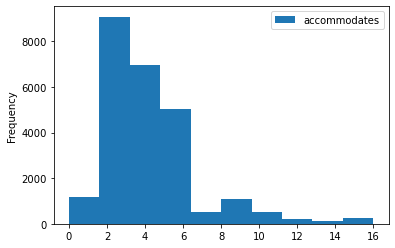

In [19]:
#df1.plot(x='accommodates', y =['property_type', 'room_type'], kind='scatter')
df1.info()
#df1['accommodates']= df1['accommodates'].astype(int)

df1.plot(x='room_type', y='accommodates', kind='hist')
plt.show()

<AxesSubplot:xlabel='beds', ylabel='reviews_per_month'>

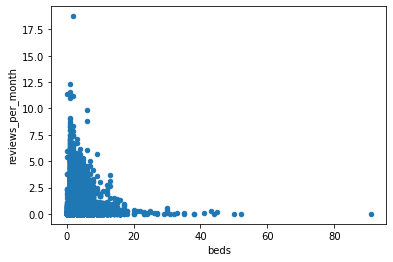

In [20]:
df1.plot(x='beds', y = 'reviews_per_month', kind='scatter')
plt.show()

<AxesSubplot:xlabel='bedrooms', ylabel='reviews_per_month'>

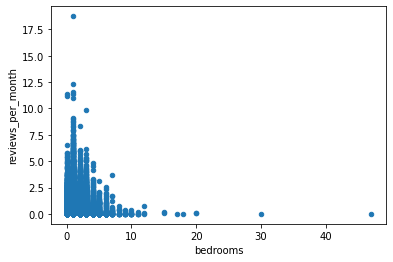

In [21]:
df1.plot(x='bedrooms', y = 'reviews_per_month', kind='scatter', legend=True)
plt.show()

<AxesSubplot:ylabel='Frequency'>

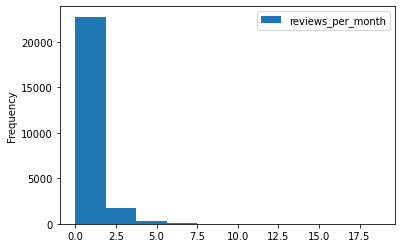

,id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,15965441,José,11/14/16,within an hour,83%,0%,f,3.0,t,t,...,150.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00
1,47908784,Raquel,7/15/16,within a day,50%,100%,f,1.0,t,f,...,450.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00
2,52239613,Fabio,9/13/21,within a day,100%,89%,f,0.0,t,f,...,350.0,5.000000,5.000000,5.000000,4.890000,4.780000,4.780000,4.890000,f,1.16
3,10445855,Márcio,1/24/12,within an hour,100%,100%,f,2.0,t,t,...,145.0,4.780000,4.910000,4.890000,4.930000,4.870000,4.700000,4.570000,f,0.64
4,5.65E+17,Júlio,12/07/14,within an hour,100%,67%,f,0.0,t,t,...,180.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,f,0.00


room_type
6/21/22            AxesSubplot(0.125,0.125;0.775x0.755)
Entire home/apt    AxesSubplot(0.125,0.125;0.775x0.755)
Hotel room         AxesSubplot(0.125,0.125;0.775x0.755)
Private room       AxesSubplot(0.125,0.125;0.775x0.755)
Shared room        AxesSubplot(0.125,0.125;0.775x0.755)
Name: reviews_per_month, dtype: object

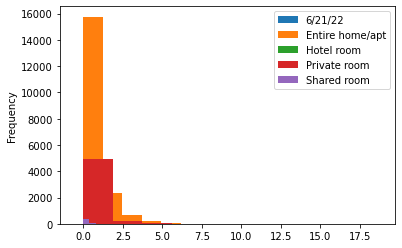

In [22]:
df.plot(x='room_type', y = 'reviews_per_month', kind='hist')
plt.show()

df.head()
#define index column
df.set_index('accommodates', inplace=True)

#group data by product and display sales as line chart
df.groupby('room_type')['reviews_per_month'].plot(kind = 'hist', legend=True)

In [23]:
df1['property_type'].value_counts()

Entire rental unit             14315
Private room in rental unit     3043
Entire condo                    1707
Entire home                     1139
Private room in home             974
                               ...  
364                                1
Shared room in nature lodge        1
Yurt                               1
Shared room in cottage             1
Room in nature lodge               1
Name: property_type, Length: 84, dtype: int64

In [24]:
df_room_type.info()
dfx = df_room_type[['accommodates','bedrooms','beds','price','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month','room_type_Entire home/apt','room_type_Hotel room','room_type_Private room', 'room_type_Shared room']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24886 entries, 0 to 24885
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   property_type                24881 non-null  object 
 1   accommodates                 24886 non-null  int64  
 2   bathrooms_text               24828 non-null  object 
 3   bedrooms                     24886 non-null  int64  
 4   beds                         24886 non-null  int64  
 5   price                        24880 non-null  float64
 6   review_scores_rating         24886 non-null  float64
 7   review_scores_accuracy       24886 non-null  float64
 8   review_scores_cleanliness    24886 non-null  float64
 9   review_scores_checkin        24886 non-null  float64
 10  review_scores_communication  24886 non-null  float64
 11  review_scores_location       24886 non-null  float64
 12  review_scores_value          24886 non-null  float64
 13  instant_bookable

,accommodates,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
count,24886.000000,24886.000000,24886.000000,24880.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000
mean,4.146709,1.606847,2.583581,745.423071,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,0.562298,0.768866,0.002692,0.210158,0.018082
std,2.452878,1.131133,2.224452,4983.738386,0.611490,0.372759,0.417634,0.301269,0.327087,0.293793,0.398618,0.920987,0.421566,0.051818,0.407429,0.133252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,180.000000,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,0.000000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,2.000000,300.000000,4.700000,4.787037,4.699627,4.900000,4.880000,4.870000,4.666319,0.160000,1.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,3.000000,600.000000,5.000000,5.000000,4.970000,5.000000,5.000000,5.000000,4.880000,0.750000,1.000000,0.000000,0.000000,0.000000
max,16.000000,47.000000,91.000000,591723.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,18.740000,1.000000,1.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24886 entries, 0 to 24885
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accommodates                 24886 non-null  int64  
 1   bedrooms                     24886 non-null  int64  
 2   beds                         24886 non-null  int64  
 3   price                        24880 non-null  float64
 4   review_scores_rating         24886 non-null  float64
 5   review_scores_accuracy       24886 non-null  float64
 6   review_scores_cleanliness    24886 non-null  float64
 7   review_scores_checkin        24886 non-null  float64
 8   review_scores_communication  24886 non-null  float64
 9   review_scores_location       24886 non-null  float64
 10  review_scores_value          24886 non-null  float64
 11  reviews_per_month            24886 non-null  float64
 12  room_type_Entire home/apt    24886 non-null  uint8  
 13  room_type_Hotel 

,accommodates,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2,1,1,150.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,0.00,0,0,1,0
1,4,2,2,450.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,0.00,1,0,0,0
2,5,2,5,350.0,5.000000,5.000000,5.000000,4.890000,4.780000,4.780000,4.890000,1.16,1,0,0,0
3,3,1,2,145.0,4.780000,4.910000,4.890000,4.930000,4.870000,4.700000,4.570000,0.64,1,0,0,0
4,4,2,3,180.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,0.00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24881,3,1,2,330.0,4.678449,4.787037,4.699627,4.874502,4.854086,4.856884,4.666319,0.00,1,0,0,0
24882,2,1,1,188.0,3.750000,4.750000,5.000000,4.250000,3.500000,4.750000,3.750000,0.78,1,0,0,0
24883,2,1,2,89.0,4.920000,4.970000,4.920000,4.980000,4.980000,5.000000,4.940000,1.47,0,0,1,0
24884,4,2,4,536.0,4.500000,4.830000,4.170000,4.830000,5.000000,4.670000,4.330000,0.10,1,0,0,0


True

<AxesSubplot:>

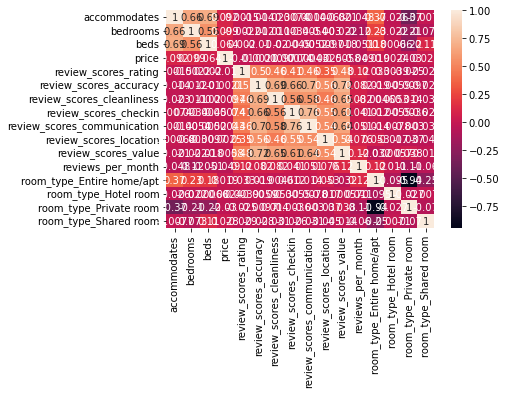

In [25]:
dfx.describe()
dfx.info()
dfx.fillna(0)
dfx.isnull().values.any()
c=dfx.corr()
sns.heatmap(c, annot=True)
plt.show()

In [40]:
dfx.isnull().values.any()
dfx.isna().sum()

False

accommodates                   0
bedrooms                       0
beds                           0
price                          0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
room_type_Entire home/apt      0
room_type_Hotel room           0
room_type_Private room         0
room_type_Shared room          0
dtype: int64

In [41]:
dfx['price'] =dfx['price'].fillna(0)

/var/folders/16/sj7htwpn37x5chbjt67h8nrr0000gn/T/ipykernel_37601/1277202630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['price'] =dfx['price'].fillna(0)


In [42]:
#OLS
! pip install -U mlxtend
! pip install -U statsmodels
! pip install -U scikit-learn

In [43]:
from sklearn import datasets
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
from itertools import cycle
from tqdm.auto import tqdm

In [44]:
y = dfx["reviews_per_month"]
X = dfx.drop(["reviews_per_month"], axis=1)

In [45]:
X = sm.add_constant(X) # by default statsmodels does not add an intercept
# add a constant is the same as adding a column of 1 to X .
full_model = sm.OLS(y, X).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      reviews_per_month   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     113.7
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:42:57   Log-Likelihood:                -32437.
No. Observations:               24886   AIC:                         6.491e+04
Df Residuals:                   24870   BIC:                         6.504e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.9080      0.412     -2.202      0.028      -1.716      -0.100
accommodates                   -0.0056      0.004     -1.489      0.137      -0.013       0.002
bedrooms                       -0.1217      0.007    -17.748      0.000      -0.135      -0.108
beds                            0.0090      0.004      2.476      0.013       0.002       0.016
price                        -6.42e-06   1.14e-06     -5.626      0.000   -8.66e-06   -4.18e-06
review_scores_rating            0.1309      0.011     11.832      0.000       0.109       0.153
review_scores_accuracy         -0.0561      0.027     -2.101      0.036      -0.108      -0.004
review_scores_cleanliness       0.0159      0.020      0.799      0.424      -0.023       0.055
review_scores_checkin          -0.1471      0.031     -4.793      0.000      -0.207      -0.087
review_scores_communication    -0.1374      0.030     -4.624      0.000      -0.196      -0.079
review_scores_location          0.0634      0.025      2.555      0.011       0.015       0.112
review_scores_value             0.3355      0.023     14.757      0.000       0.291       0.380
room_type_Entire home/apt       0.8444      0.399      2.118      0.034       0.063       1.626
room_type_Hotel room            0.8830      0.413      2.137      0.033       0.073       1.693
room_type_Private room          0.5034      0.399      1.262      0.207      -0.278       1.285
room_type_Shared room           0.2872      0.401      0.716      0.474      -0.499       1.073
==============================================================================
Omnibus:                    18452.994   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542445.789
Skew:                           3.274   Prob(JB):                         0.00
Kurtosis:                      24.915   Cond. No.                     7.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
#linear regression
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X, y)

LinearRegression()

In [49]:
lr.coef_

array([ 0.00000000e+00, -5.58018669e-03, -1.21723519e-01,  8.97624677e-03,
       -6.41984723e-06,  1.30899861e-01, -5.60796918e-02,  1.59286741e-02,
       -1.47095095e-01, -1.37430774e-01,  6.33820241e-02,  3.35487022e-01,
        8.44437594e-01,  8.82996270e-01,  5.03387181e-01,  2.87240710e-01])

In [50]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

y = dfx['reviews_per_month']
x = dfx.drop('reviews_per_month', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train.shape
x_test.shape
y_train.shape
y_test.shape


(19908, 15)

(4978, 15)

(19908,)

(4978,)

In [51]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [52]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
model_sfs = SFS(lr, scoring='neg_mean_squared_error', k_features=4, verbose=1, cv=5,)

In [55]:
model_sfs.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished
Features: 1/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished
Features: 2/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.2s finished
Features: 3/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.2s finished
Features: 4/4

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(4, 4),
                          scoring='neg_mean_squared_error', verbose=1)

In [56]:
model_sfs.get_metric_dict()

{1: {'feature_idx': (11,),
  'cv_scores': array([-0.67685941, -0.90199742, -0.96203408, -0.81095999, -0.83595063]),
  'avg_score': -0.8375603059976392,
  'feature_names': ('review_scores_value',),
  'ci_bound': 0.12352282048530241,
  'std_dev': 0.09610495081376018,
  'std_err': 0.04805247540688009},
 2: {'feature_idx': (11, 12),
  'cv_scores': array([-0.66521453, -0.88493082, -0.94959122, -0.79149257, -0.82831928]),
  'avg_score': -0.8239096853827107,
  'feature_names': ('review_scores_value', 'room_type_Entire home/apt'),
  'ci_bound': 0.12297741617032538,
  'std_dev': 0.0956806077275309,
  'std_err': 0.04784030386376544},
 3: {'feature_idx': (2, 11, 12),
  'cv_scores': array([-0.65641003, -0.86301189, -0.92254037, -0.77695578, -0.81252604]),
  'avg_score': -0.806288823642015,
  'feature_names': ('bedrooms',
   'review_scores_value',
   'room_type_Entire home/apt'),
  'ci_bound': 0.11509622175895916,
  'std_dev': 0.08954877072541065,
  'std_err': 0.044774385362705324},
 4: {'feature_i

In [57]:
pd.DataFrame.from_dict(model_sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(11,)","[-0.6768594097379345, -0.9019974177765702, -0....",-0.83756,"(review_scores_value,)",0.123523,0.096105,0.048052
2,"(11, 12)","[-0.665214532944452, -0.8849308239167312, -0.9...",-0.82391,"(review_scores_value, room_type_Entire home/apt)",0.122977,0.095681,0.04784
3,"(2, 11, 12)","[-0.6564100312335577, -0.8630118936412964, -0....",-0.806289,"(bedrooms, review_scores_value, room_type_Enti...",0.115096,0.089549,0.044774
4,"(2, 5, 11, 12)","[-0.6531651097904069, -0.8594019097137056, -0....",-0.803004,"(bedrooms, review_scores_rating, review_scores...",0.115273,0.089686,0.044843


Text(0.5, 1.0, 'Sequential Forward Selection')

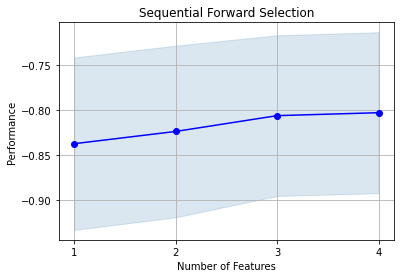

In [58]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(model_sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [59]:
X_selected = model_sfs.transform(X)
X_selected.shape

(24886, 4)

In [60]:
lr_after_selection = lr.fit(X_selected, y)

In [61]:
lr_after_selection.predict(X_selected)[:10] 

array([0.37074576, 0.59412598, 0.67582438, 0.70654544, 0.24852257,
       0.59412598, 0.80353172, 0.71634917, 0.20799779, 0.71634917])

In [62]:
from sklearn.feature_selection import RFE

In [63]:
model_RFE = RFE(lr, n_features_to_select=4)
model_RFE.fit(X, y)

RFE(estimator=LinearRegression(), n_features_to_select=4)

In [64]:
model_RFE.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False])

In [65]:
X.loc[:, model_RFE.get_support()]

,review_scores_value,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room
0,4.666319,0,0,1
1,4.666319,1,0,0
2,4.890000,1,0,0
3,4.570000,1,0,0
4,4.666319,0,0,1
...,...,...,...,...
24881,4.666319,1,0,0
24882,3.750000,1,0,0
24883,4.940000,0,0,1
24884,4.330000,1,0,0


In [67]:
#regularization
from sklearn.linear_model import Lasso, LassoCV, lars_path

In [68]:
model_lasso = Lasso(alpha = 0.1, normalize=True)
model_lasso.fit(X, y)
model_lasso.coef_

TypeError: __init__() got an unexpected keyword argument 'normalize'

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
X_train.shape
X_test.shape

(19908, 16)

(4978, 16)

In [73]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [74]:
model_lassoCV = LassoCV(cv=5) # note we don't need to normalize again
model_lassoCV.fit(scaler.transform(X_train), y_train) # note we transform X_train

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.684044809824627, tolerance: 1.4038273381822157
  model = cd_fast.enet_coordinate_descent_gram(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.17561284952535, tolerance: 1.4038273381822157
  model = cd_fast.enet_coordinate_descent_gram(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.056071708178933, tolerance: 1.3565258855682558
  model = cd_fast.enet_coordinate_descent_gram(
/Users/apple/opt/anaconda3/lib/python3.9/site-packages

LassoCV(cv=5)

In [76]:
y_hat_test = model_lassoCV.predict(scaler.transform((X_test))) 

In [77]:
from sklearn import metrics
metrics.mean_squared_error(y_true=y_test, y_pred=y_hat_test)

0.8214578435891412